In [1]:
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import matplotlib.pyplot as plt

# Análise Exploratória dos dados amostrais

## isFraud

In [2]:
amostra = pd.read_csv('amostra.csv')
amostra['isFraud'].value_counts()

0    47023
1      118
Name: isFraud, dtype: int64

In [3]:
amostra['isFraud'].var()

0.0024969162237693174

In [4]:
# P(Y = 1 | X = i)

for i in amostra['action'].unique():
    f = (amostra['action'] == i)
    print(f'P(Y = 1 | X = {i}) = {sum(amostra.loc[f,"isFraud"]) / sum(f)}')

P(Y = 1 | X = CASH_IN) = 0.0
P(Y = 1 | X = PAYMENT) = 0.0
P(Y = 1 | X = DEBIT) = 0.0
P(Y = 1 | X = CASH_OUT) = 0.013181411974977658
P(Y = 1 | X = TRANSFER) = 0.0019149626744563452


## Fraudadores - origem

In [5]:
f = (amostra['isFraud']==1)
amostra.loc[f, 'nameOrig'].value_counts() #Quantidade de fraudes por clientes

C5898004636     45
C8809176734      7
C1755595044      5
C1091452202      1
CC1879473716     1
                ..
CC0102982252     1
CC3246258814     1
CC5459495244     1
CC1819763880     1
CC6774377567     1
Name: nameOrig, Length: 64, dtype: int64

In [6]:
# P(Y = 1 | X = i) #para os maiores fraudadores

fraudadores = ['C5898004636', 'C8809176734', 'C1755595044']
for i in fraudadores:
    f = (amostra['nameOrig'] == i)
    print(f'P(Y = 1 | X = {i}) = {sum(amostra.loc[f,"isFraud"]) / sum(f)}')

P(Y = 1 | X = C5898004636) = 0.05125284738041002
P(Y = 1 | X = C8809176734) = 0.020348837209302327
P(Y = 1 | X = C1755595044) = 0.14285714285714285


## Perfil dos fraudadores - origem

In [7]:
f = amostra['nameOrig'].isin(fraudadores)
f = f & (amostra['isFraud'] == 1)
amostra.loc[f, 'action'].value_counts()

TRANSFER    57
Name: action, dtype: int64

<AxesSubplot:xlabel='nameOrig', ylabel='amount'>

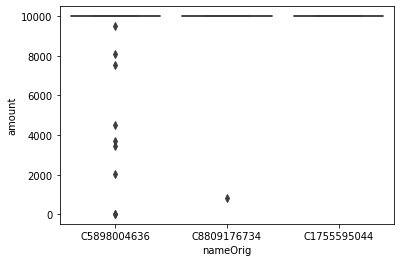

In [8]:
f = amostra['nameOrig'].isin(fraudadores)
f = f & (amostra['action'] == 'TRANSFER')
sns.boxplot(y='amount', x='nameOrig', data=amostra[f])

In [9]:
amostra.loc[f, 'amount'].value_counts() #SMURFING!!!!!!

10000.00    966
20.00         2
3699.71       1
9512.62       1
2052.31       1
3441.73       1
833.92        1
7539.76       1
8100.24       1
4514.72       1
Name: amount, dtype: int64

# Demais features

In [10]:
amostra['nameOrig'].nunique() #número de origens

170

In [11]:
amostra['nameDest'].nunique() #número de destinos

680

In [12]:
amostra['action'].value_counts()

TRANSFER    30810
CASH_IN      7106
CASH_OUT     4476
PAYMENT      4402
DEBIT         347
Name: action, dtype: int64

In [13]:
amostra[['amount', 'oldBalanceOrig','newBalanceOrig',
         'oldBalanceDest', 'newBalanceDest']].describe()

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
count,47141.000000,4.714100e+04,4.714100e+04,4.714100e+04,4.714100e+04
mean,39915.952964,3.573706e+06,3.575781e+06,2.299096e+06,2.306218e+06
std,64219.336652,1.100401e+06,1.088634e+06,1.935350e+06,1.938362e+06
min,0.000000,-2.407614e+04,-2.407614e+04,-2.407614e+04,-1.407614e+04
25%,10000.000000,3.083028e+06,3.082965e+06,4.577737e+04,4.937640e+04
50%,10000.000000,3.595684e+06,3.592116e+06,2.833050e+06,2.841751e+06
75%,14752.830000,4.159427e+06,4.155447e+06,3.879842e+06,3.889767e+06
max,461835.250000,7.841587e+06,7.841587e+06,7.738243e+06,7.738695e+06


# Resultados

In [31]:
results = pd.read_csv('resultados_preliminares_cenario4.csv')
results.drop(['cenario/amostra'], axis=1, inplace=True)
results.groupby('Model').mean()
# results.isna().sum()

,AUC,B_ACC,F1,F2
Model,,,,
LogClass,0.993141,0.993141,0.651157,0.775723
MLP,0.971922,0.971922,0.948653,0.945374
RF,0.993821,0.993821,0.989372,0.988246
SVM,0.803333,0.803333,0.701723,0.639106
XGB,0.994311,0.994311,0.988492,0.988478


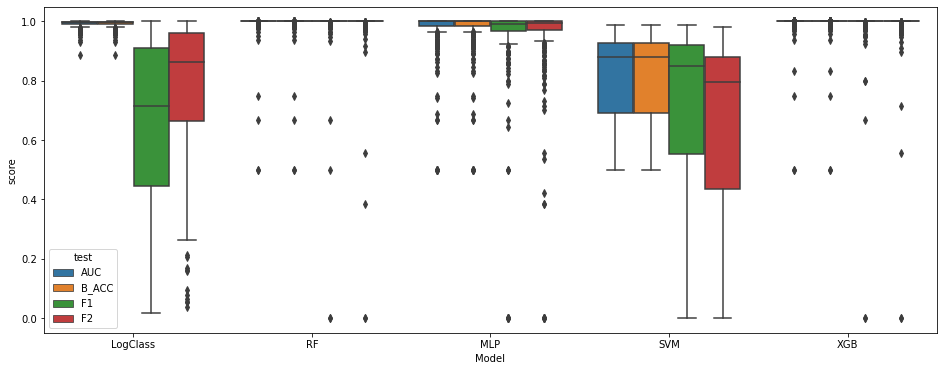

In [22]:
melt_results = results.melt(id_vars='Model', var_name='test', value_name='score')

fig, ax = plt.subplots(figsize=[16,6])
sns.boxplot(x='Model', y='score', hue='test', data=melt_results, ax=ax);

## Modelo Logístico

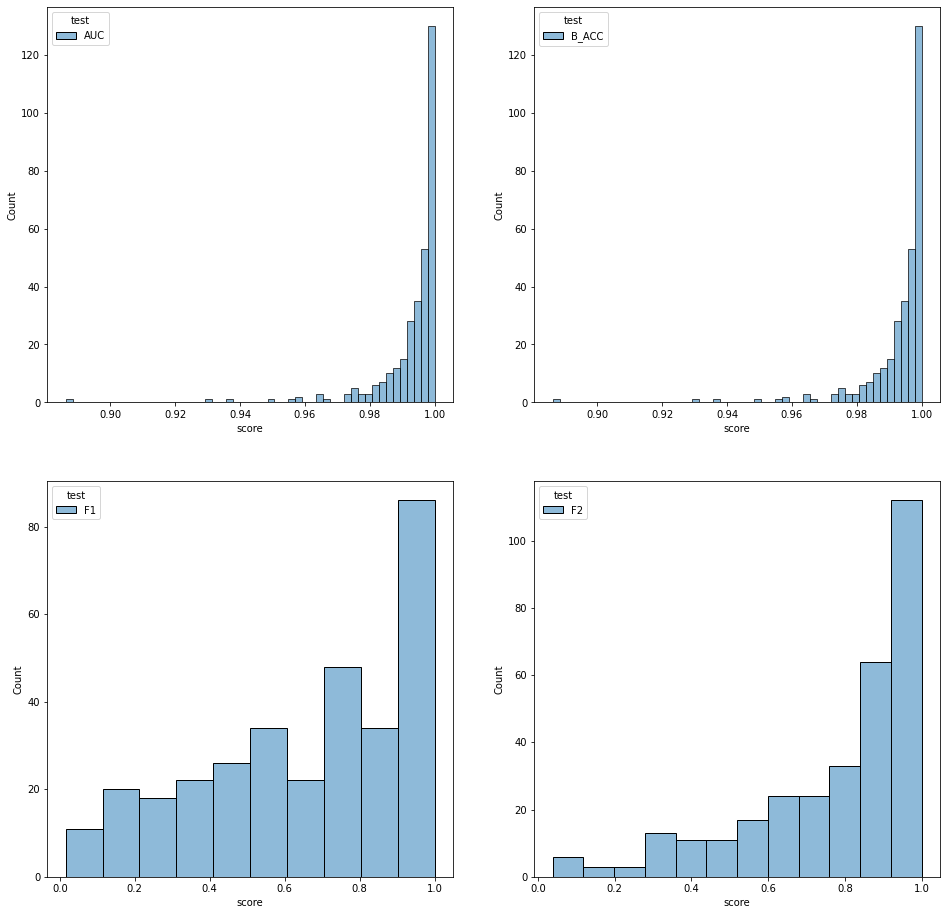

In [23]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'LogClass'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

# Random Forests

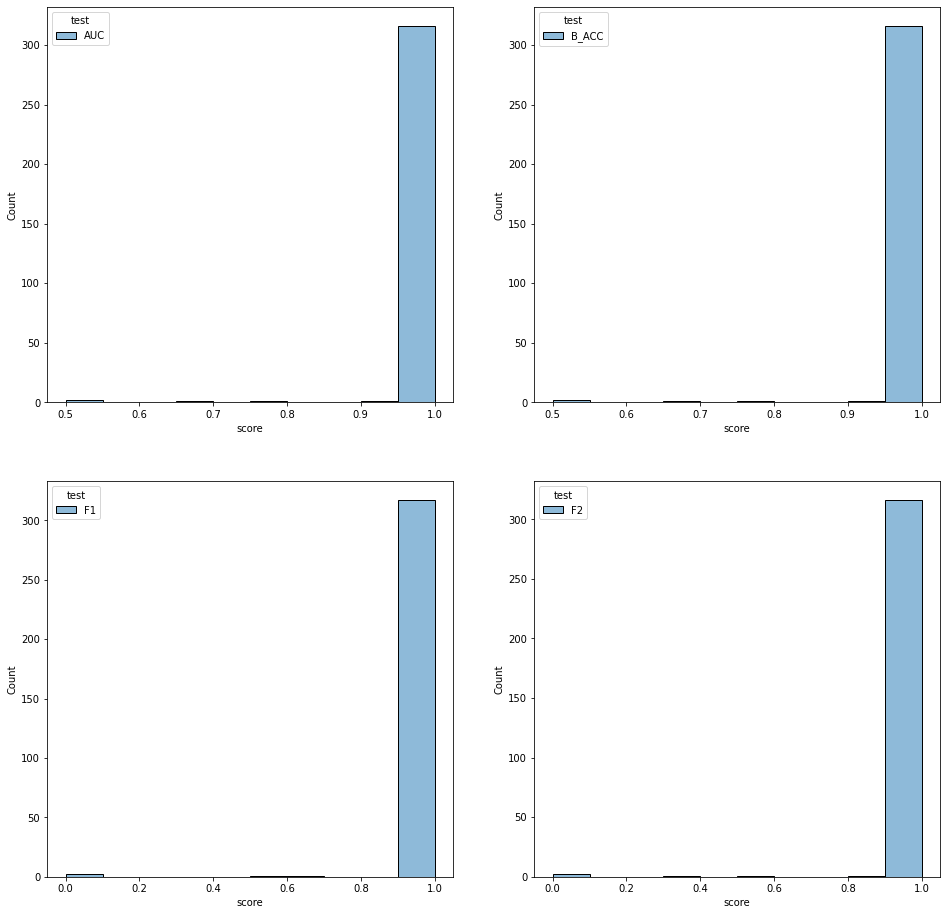

In [24]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'RF'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## MLP

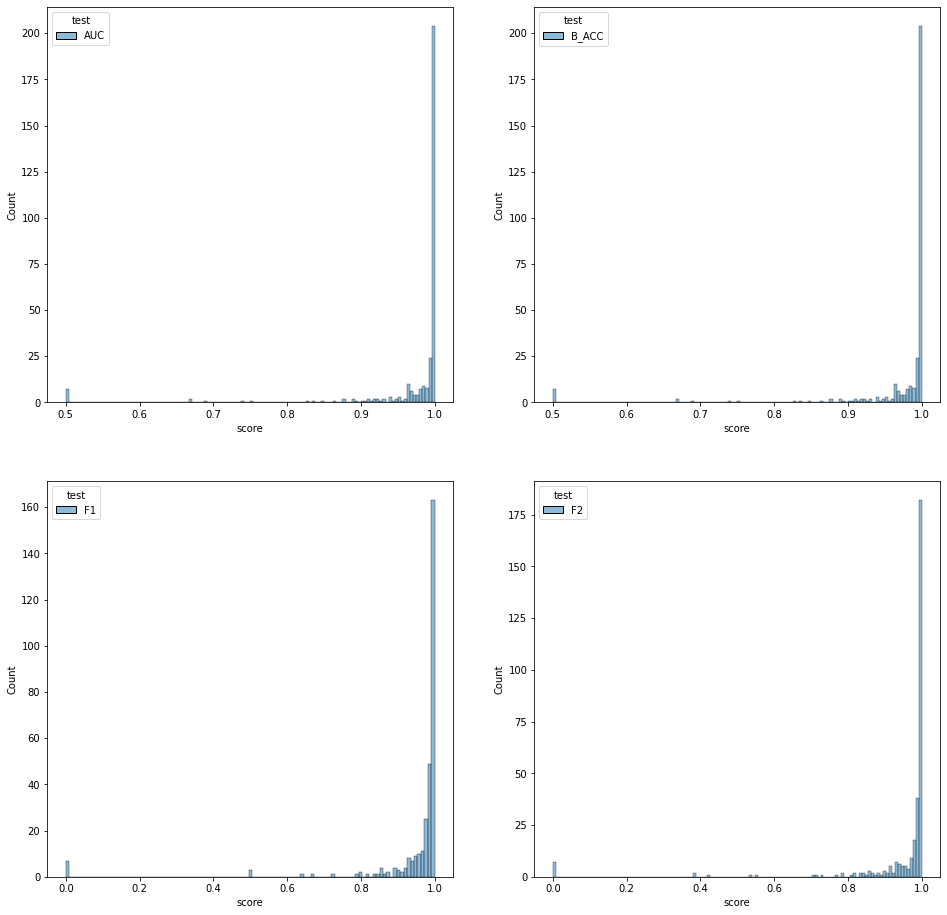

In [25]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'MLP'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## XGB

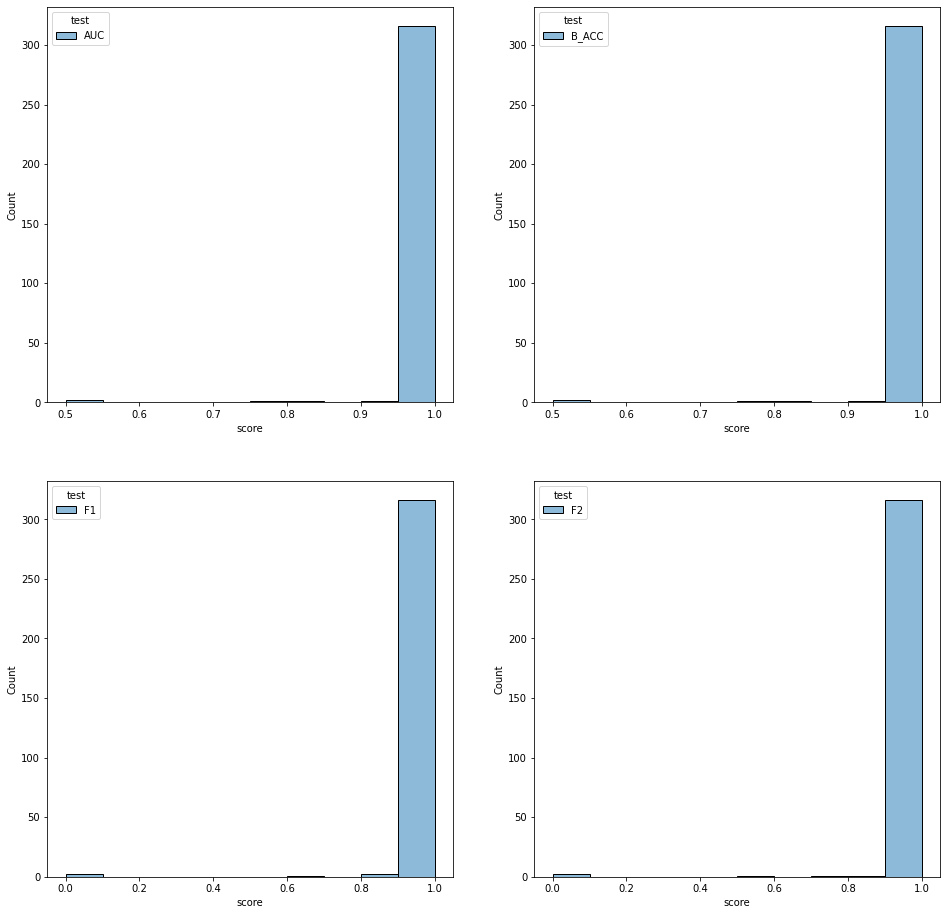

In [26]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'XGB'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);

## SVM

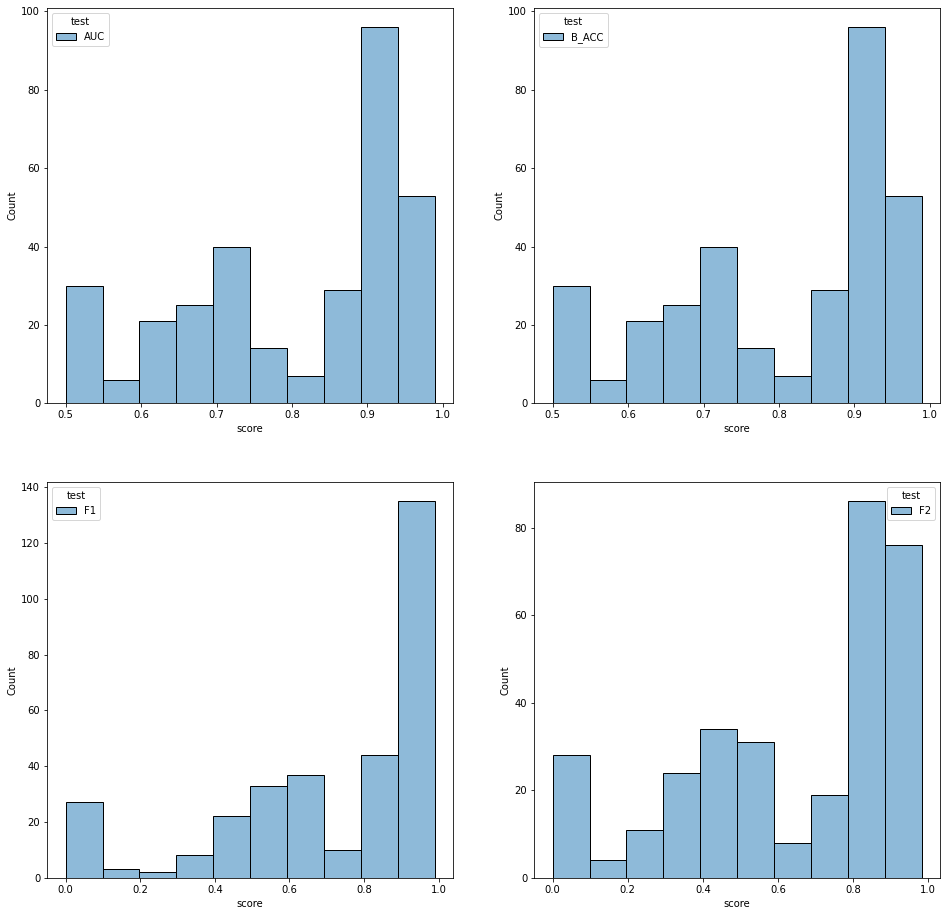

In [27]:
fig, ax = plt.subplots(2,2,figsize=[16,16])
f = melt_results['Model'] == 'SVM'
f1 = f & (melt_results['test']=='AUC')
f2 = f & (melt_results['test']=='B_ACC')
f3 = f & (melt_results['test']=='F1')
f4 = f & (melt_results['test']=='F2')
sns.histplot(x='score', hue = "test", data=melt_results[f1], ax=ax[0,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f2], ax=ax[0,1]);
sns.histplot(x='score', hue = "test", data=melt_results[f3], ax=ax[1,0]);
sns.histplot(x='score', hue = "test", data=melt_results[f4], ax=ax[1,1]);